In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
from math import sqrt
from dtw import dtw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

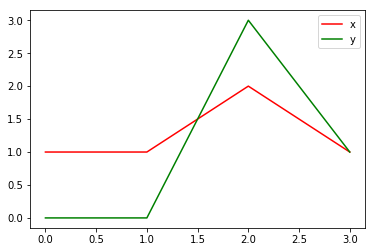

In [50]:
x = np.array([1, 1, 2, 1])
y = np.array([0, 0, 3, 1])

plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend()

In [51]:
def rescale_(values, scaler):
    values = values.reshape((len(values), 1))
    # train the standardization
    scaler = scaler.fit(values)
    normalized = scaler.transform(values)
    return normalized

In [52]:
def distances_(x, y):
    distances = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            distances[i,j] = (x[j]-y[i])**2  
    return distances

def accumulated_cost_(x, y, distances):
    accumulated_cost = np.zeros((len(y), len(x)))
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
    return accumulated_cost

def path_cost(x, y, accumulated_cost, distances):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [y, x] in path:
        cost = cost +distances[x, y]
    return path, cost  

def dtw_path_cost(x, y):
    distances = distances_(x,y)
    accumulated_cost = accumulated_cost_(x,y,distances)
    path, cost = path_cost(x, y, accumulated_cost, distances)
    return path, cost

In [53]:
l2_norm = lambda x, y: (x - y) ** 2

### Normalize

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized = rescale_(y, scaler)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 0.000000, Max: 3.000000


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


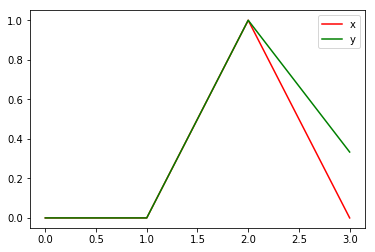

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_normalized = rescale_(x, scaler)
y_normalized = rescale_(y, scaler)

plt.plot(x_normalized,'r', label='x')
plt.plot(y_normalized, 'g', label='y')
plt.legend()

In [58]:
_, cost = dtw_path_cost(x_normalized, y_normalized)
print(cost)

0.1111111111111111


In [59]:
dist, cost_matrix, acc_cost_matrix, path = dtw(x_normalized, y_normalized, dist=l2_norm)
print(dist)

0.1111111111111111


### Standardize

In [61]:
scaler = StandardScaler()
normalized = rescale_(y, scaler)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 1.000000, StandardDeviation: 1.224745


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


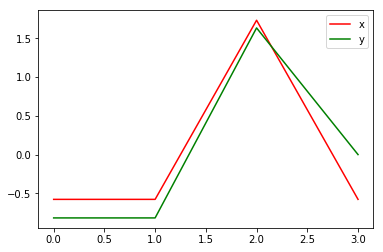

In [62]:
scaler = StandardScaler()
x_standardized = rescale_(x, scaler)
y_standardized = rescale_(y, scaler)

plt.plot(x_standardized,'r', label='x')
plt.plot(y_standardized, 'g', label='y')
plt.legend()

In [63]:
_, cost = dtw_path_cost(x_standardized, y_standardized)
print(cost)

0.5147186257614298


In [64]:
dist, cost_matrix, acc_cost_matrix, path = dtw(x_standardized, y_standardized, dist=l2_norm)
print(dist)

0.45752766734349315


### Other example

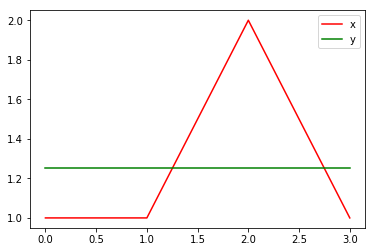

In [70]:
x = np.array([1, 1, 2, 1])
y = np.array([1.25, 1.25, 1.25, 1.25])

plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend()

In [71]:
scaler = StandardScaler()
normalized = rescale_(y, scaler)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 1.250000, StandardDeviation: 0.000000


/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dmlab/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


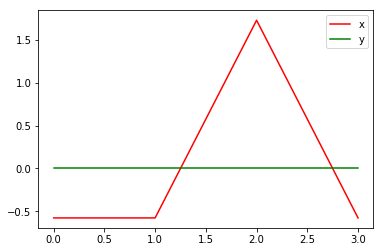

In [72]:
scaler = StandardScaler()
x_standardized = rescale_(x, scaler)
y_standardized = rescale_(y, scaler)

plt.plot(x_standardized,'r', label='x')
plt.plot(y_standardized, 'g', label='y')
plt.legend()

In [74]:
_, cost = dtw_path_cost(x_standardized, y_standardized)
print('dtw cost:', cost)

dist, cost_matrix, acc_cost_matrix, path = dtw(x_standardized, y_standardized, dist=l2_norm)
print('l2_norm cost:', dist)

dtw cost: 1.6666666666666672
l2_norm cost: 4.000000000000001
